# Notebook 03
- EDA
- Estatística descritiva
- Estatística inferencial
- Validação das hipóteses
- Análise Univariada, Bivariada e Multivariada



**LISTA DE HIPÓTESES:**
- Lojas:
    - **1.** Lojas com maior sortimento deveriam vender mais.
    - **2.** Lojas com competidores mais próximos deveriam vender menos.
    - **3.** Lojas com competidores a mais tempo, deveriam vender mais.


- Produtos:
    - **4.** Lojas com promoções ativas por mais tempo deveriam vender mais.
    - **5.** Lojas com mais dias de promoções deveriam vender mais.
    - **6.** Lojas com mais promoções consecultivas deveriam vender mais
    


- Tempo:
    - **7.** Lojas abertas durante o feriado do Natal deveriam vender mais.
    - **8.** Lojas deveriam vender mais ao longo dos anos.
    - **9.** Lojas deveriam vender mais no segundo trimestre do ano.
    - **10.** Lojas deveriam vender mais depois do dia 10 de cada mês.
    - **11.** Lojas deveriam vender menos aos finais de semana.
    - **12.** Lojas deveriam vender menos durante os feriados escolares.


# 0.0 Imports

In [1]:
import os
import pathlib
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np

from scipy                import stats as ss
from IPython.core.display import HTML


In [2]:
import warnings
warnings.filterwarnings("ignore")

## 0.1 Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [4]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
def cramer_v(x, y):
    cm = pd.crosstab(x,y).values # Criando tabela de contigências: Número de registros que correlacionam cada variável
    chi2 = ss.chi2_contingency(cm)[0] # Chi² de pearson
    n = cm.sum() # Quantidade total de registros
    r, k = cm.shape # Quantidade de linhas e colunas
    chi2corr = max(0,chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    v = np.sqrt( ( chi2corr / n ) / (min (kcorr-1, rcorr-1))) # Resultado do método V-Cramer
    return v

## 0.2 File and directory paths

In [5]:
# Diretório raíz
PACKAGE_ROOT = pathlib.Path('.').resolve().parent

# Caminhos para os diretórios dos dados
DATADIR = os.path.join(PACKAGE_ROOT, 'data')
DATADIR_PREPROCESSED = os.path.join(DATADIR, 'preprocessed')

# Caminhos para os diretórios de documentos
DOCDIR = os.path.join(PACKAGE_ROOT, 'docs')
IMAGEDIR = os.path.join(DOCDIR, 'Image')

# Files Preprocessed Data
FILE_PREPROCESSED_V1 = os.path.join(DATADIR_PREPROCESSED,'data_preprocessed_v1.csv')

## 0.3 Data loading

**Carregando os dados em que as lojas estavam abertas**

In [6]:
df = pd.read_csv(FILE_PREPROCESSED_V1)
df = df.drop(columns='Unnamed: 0')
df['date']=pd.to_datetime(df['date'])
df['promo_since']=pd.to_datetime(df['promo_since'])
df['competition_since']=pd.to_datetime(df['competition_since'])
#df['year_week']=pd.to_datetime(df['year_week'])

### 0.3.1 Data info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   store                         844392 non-null  int64         
 1   day_of_week                   844392 non-null  int64         
 2   date                          844392 non-null  datetime64[ns]
 3   sales                         844392 non-null  int64         
 4   open                          844392 non-null  int64         
 5   promo                         844392 non-null  int64         
 6   state_holiday                 844392 non-null  object        
 7   school_holiday                844392 non-null  int64         
 8   store_type                    844392 non-null  object        
 9   assortment                    844392 non-null  object        
 10  competition_distance          844392 non-null  float64       
 11  competition_o

# 1.0 EDA - Exploratory Data Analysis

**Como as variáveis impactam o fenômeno? e qual a força desse impacto?** => Regra geral do EDA

In [8]:
df1 = df.copy()

In [9]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## 1.1 Análise univariada

### 1.1.1 Response variable

<AxesSubplot:xlabel='sales'>

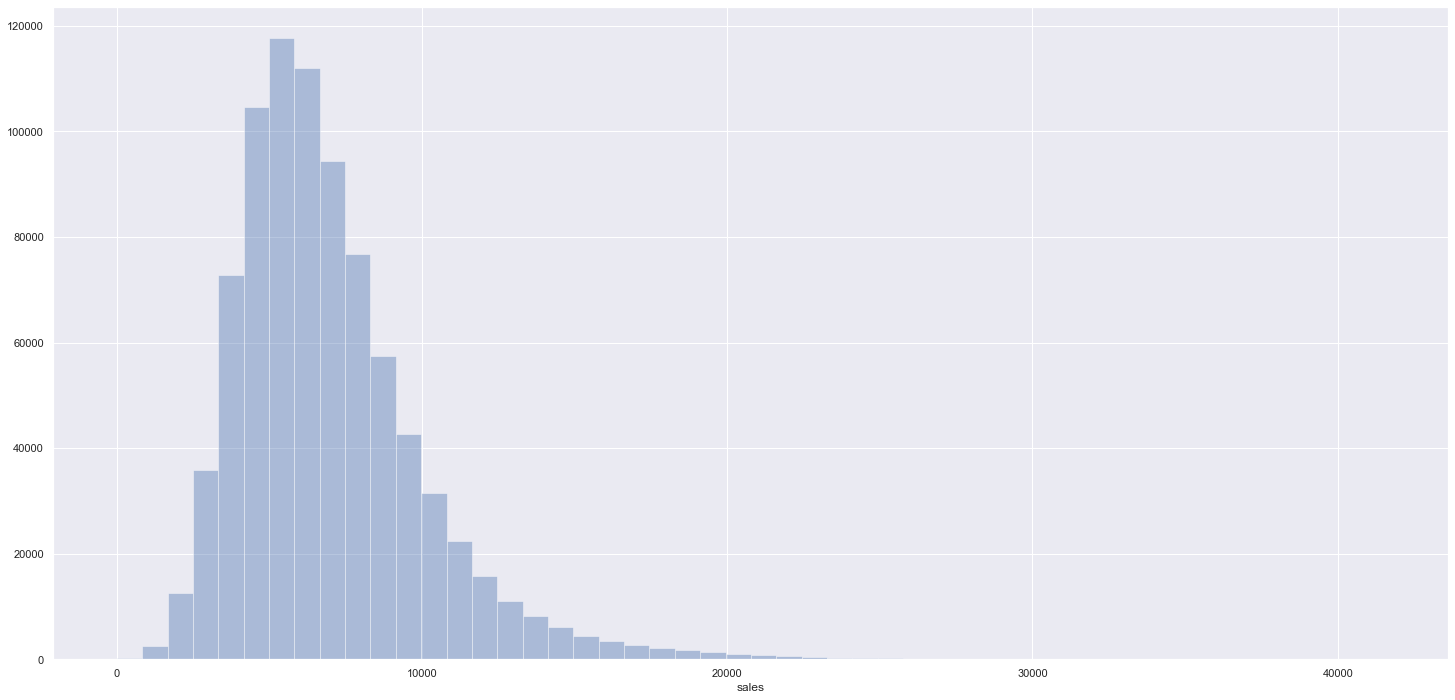

In [10]:
sns.distplot(df1['sales'], kde=False) # kde=True traça uma curva de densidade

Obs: A maioria dos algoritmos de ML foram performados com algumas condições, e uma delas, normalmente, é a curva de distribuição da variável target, de forma que quanto mais se aproxima de uma variável normal, melhor é o seu resultado.

Por isso, precisamos transformar a variável target de forma que corresponda a uma curva normal ou pelo menos tenha uma aparência semelhante.

Existem várias técnicas de transformação, como por exemplo o uso do log.

<AxesSubplot:xlabel='sales', ylabel='Density'>

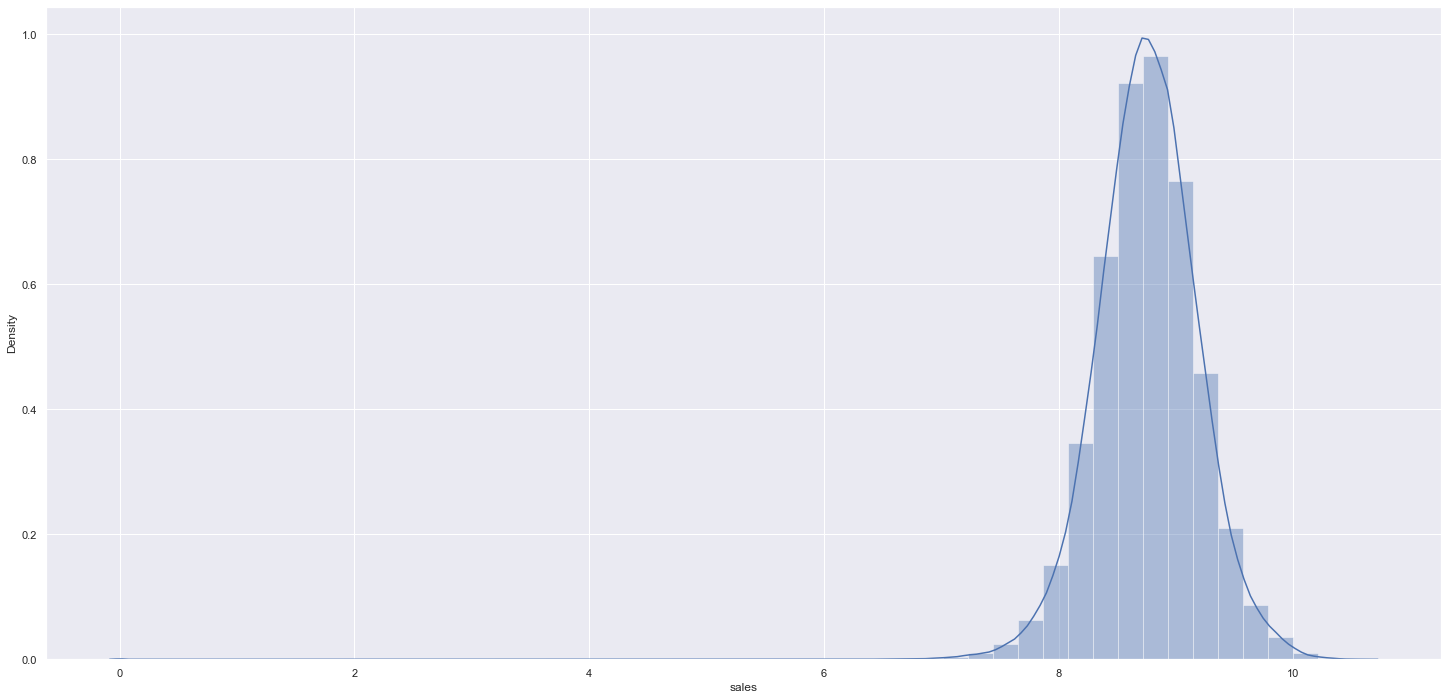

In [11]:
sns.distplot(np.log1p(df1['sales']))

### 1.1.2 Numerical variable

**Considerando somente eventos em que a loja estava aberta**

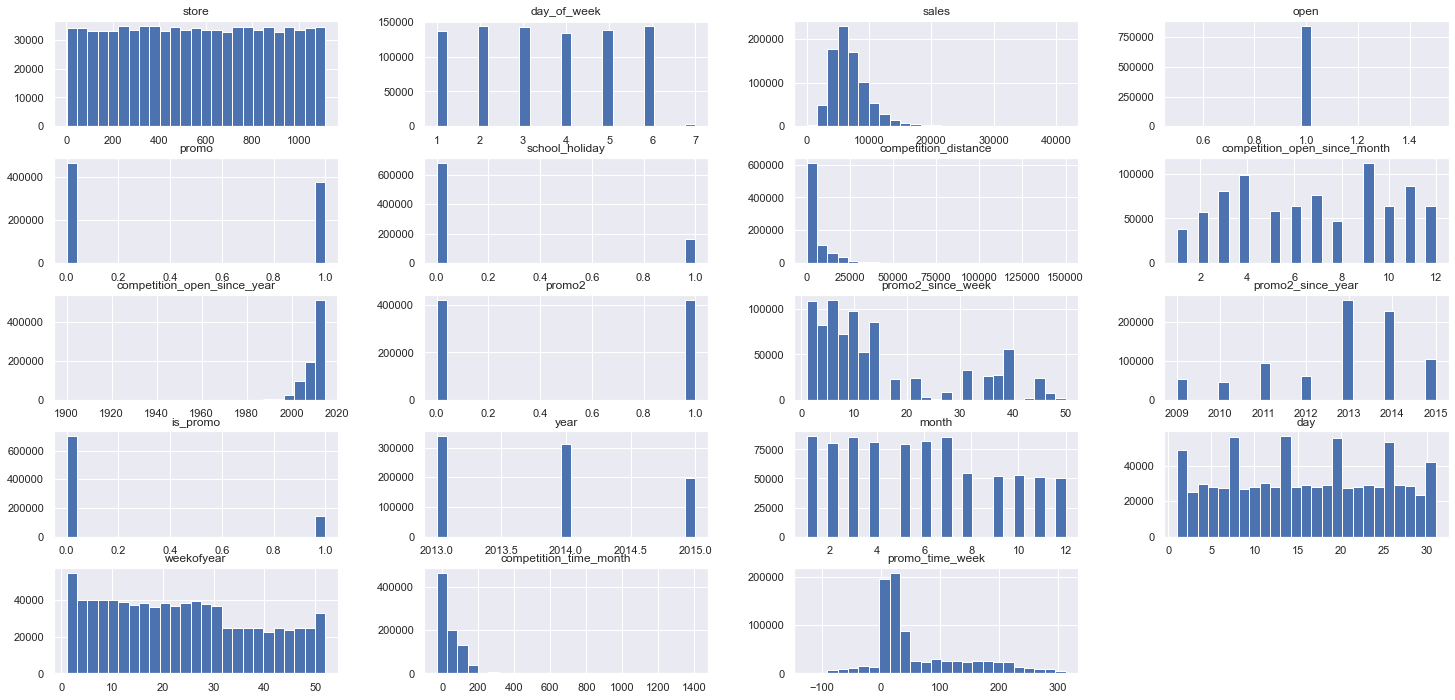

In [12]:
num_attributes.hist(bins=25);

**Lista de constatações:**
* As vendas tem uma menor frequência no domingo
* Tem mais vendas acontecendo quando não é tempo de promoção

### 1.1.1 Categorical variable

In [13]:
cat_attributes.columns

Index(['state_holiday', 'store_type', 'assortment', 'year_week'], dtype='object')

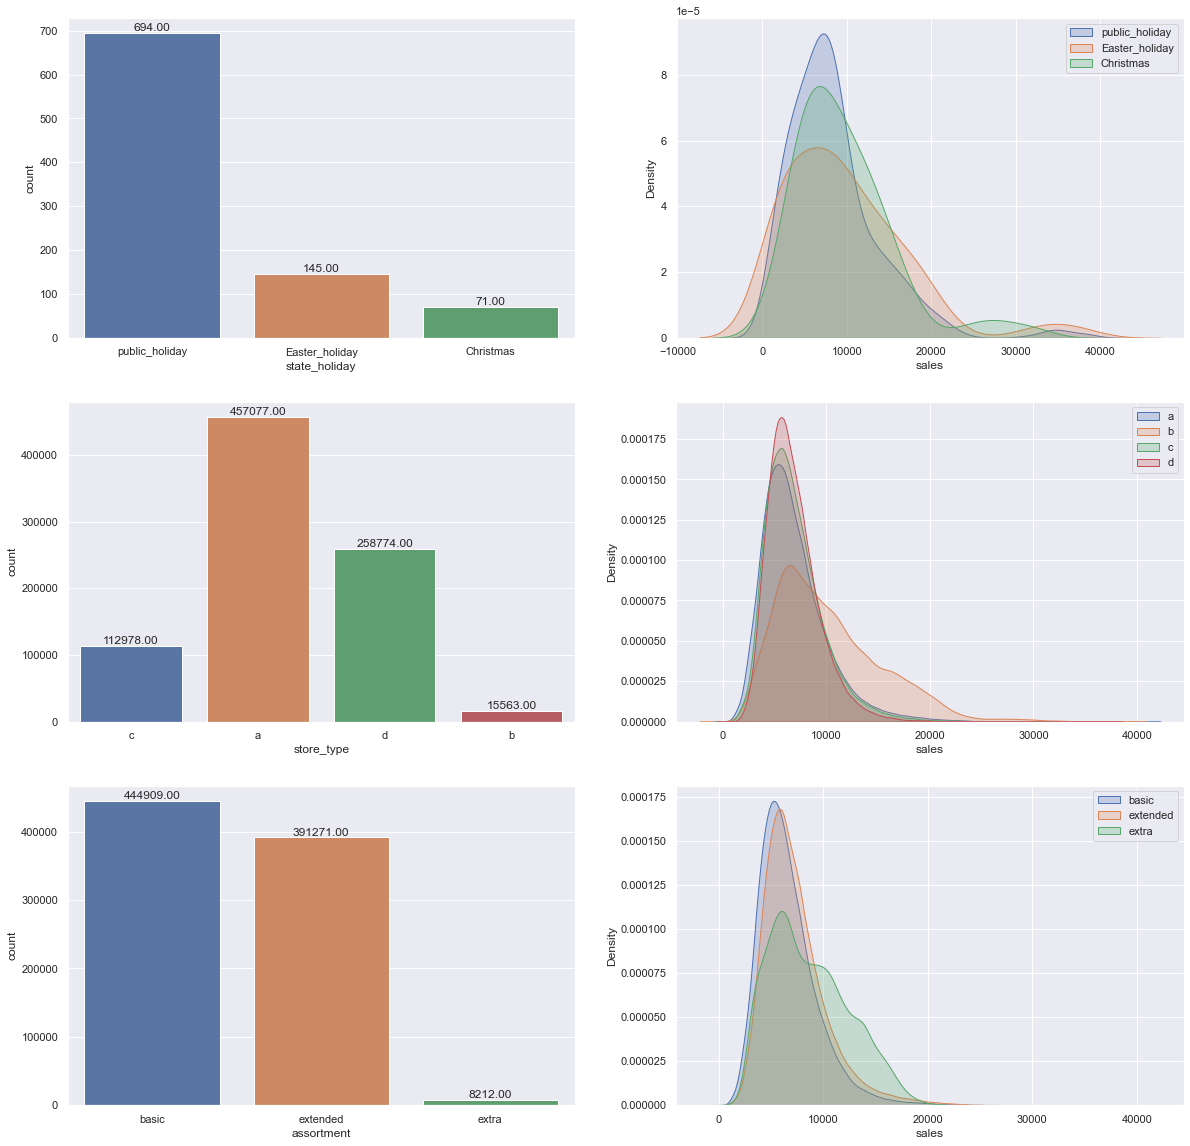

In [14]:
# Criar um grid com subplot
plt.figure(figsize=[20,20])
# State_holiday
plt.subplot(3,2,1)
a = df1[df1['state_holiday'] != 'Regular_day']
ax = sns.countplot(a['state_holiday'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'baseline', 
                xytext = (0,2), 
                textcoords = 'offset points')


plt.subplot(3,2,2)
sns.kdeplot(df1[df1['state_holiday'] == 'public_holiday']['sales'],  
            label = 'public_holiday', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)

sns.kdeplot(df1[df1['state_holiday'] == 'Easter_holiday']['sales'],  
            label = 'Easter_holiday', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)


sns.kdeplot(df1[df1['state_holiday'] == 'Christmas']['sales'],  
            label = 'Christmas', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)

plt.legend()
# Store_type
plt.subplot(3,2,3)
bx = sns.countplot(df1['store_type'])
for p in bx.patches:
    bx.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'baseline', 
                xytext = (0,2), 
                textcoords = 'offset points')



plt.subplot(3,2,4)
sns.kdeplot(df1[df1['store_type'] == 'a']['sales'],  
            label = 'a', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)


sns.kdeplot(df1[df1['store_type'] == 'b']['sales'],  
            label = 'b', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)


sns.kdeplot(df1[df1['store_type'] == 'c']['sales'],  
            label = 'c', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True) 

sns.kdeplot(df1[df1['store_type'] == 'd']['sales'],  
            label = 'd', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)
plt.legend()

# Assortment
plt.subplot(3,2,5)
cx= sns.countplot(df1['assortment'])
for p in cx.patches:
    cx.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'baseline', 
                xytext = (0,2), 
                textcoords = 'offset points')

plt.subplot(3,2,6)
sns.kdeplot(df1[df1['assortment'] == 'basic']['sales'],  
            label = 'basic', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)


sns.kdeplot(df1[df1['assortment'] == 'extended']['sales'],  
            label = 'extended', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True)


sns.kdeplot(df1[df1['assortment'] == 'extra']['sales'],  
            label = 'extra', # Nome da linha
            shade = True, # Deixar mais transparente
            legend= True) 


plt.legend()


## 1.2 Análise bivariada

### H1. Lojas com maior sortimento deveriam vender mais.

**FALSA - Lojas com maior sortimento vendem MENOS**

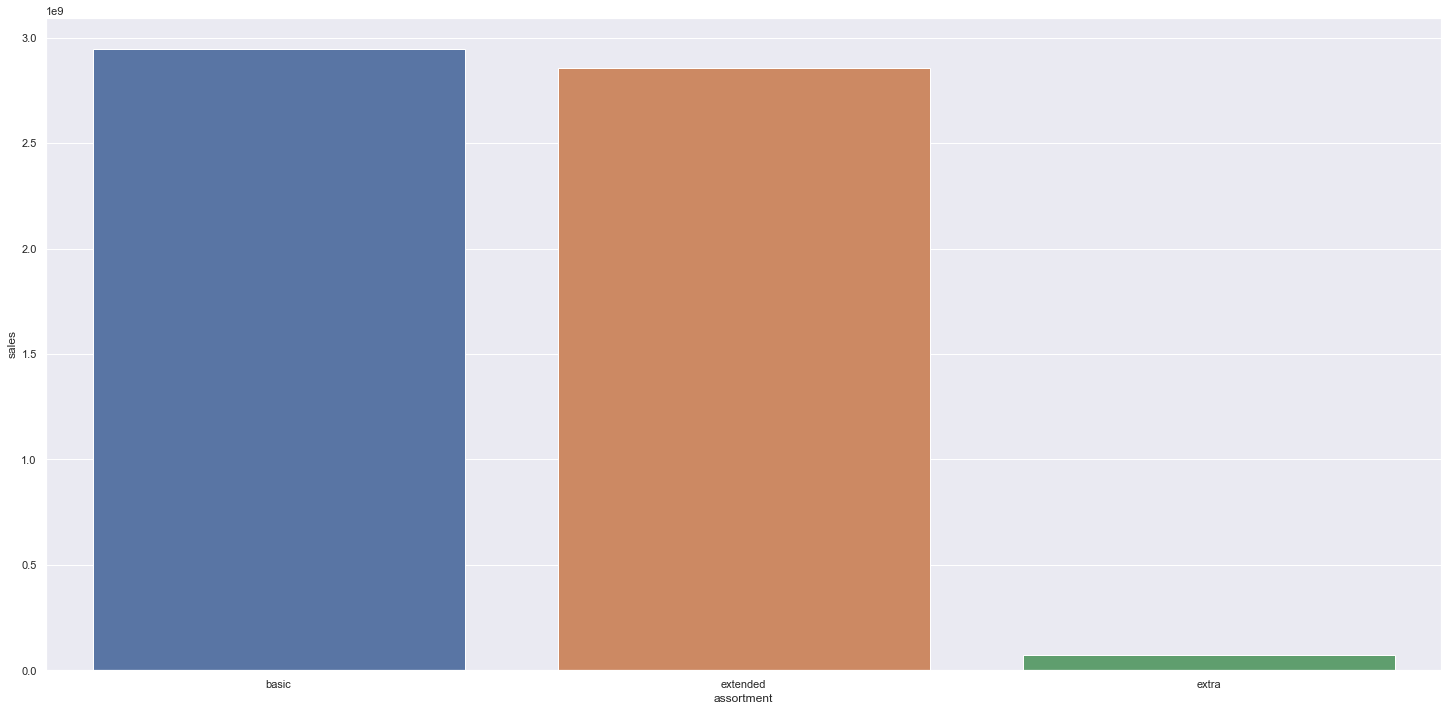

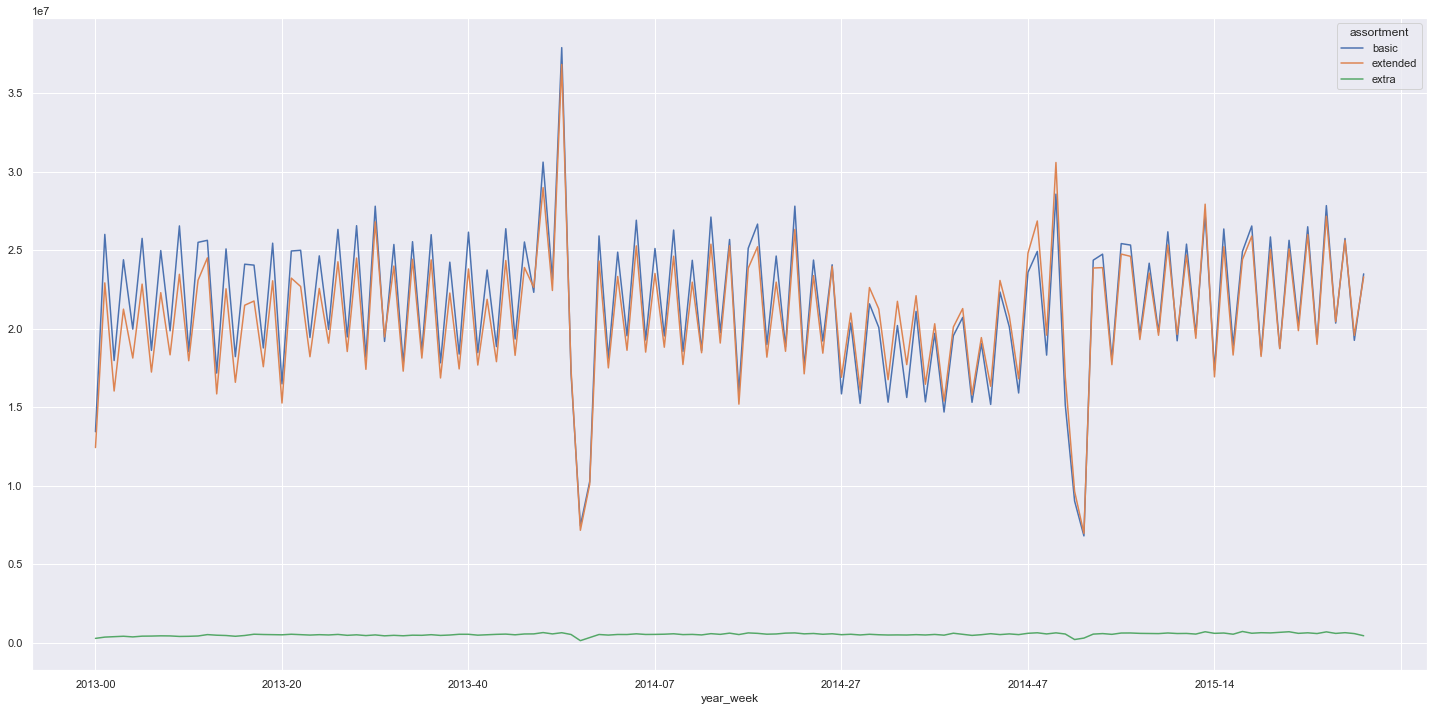

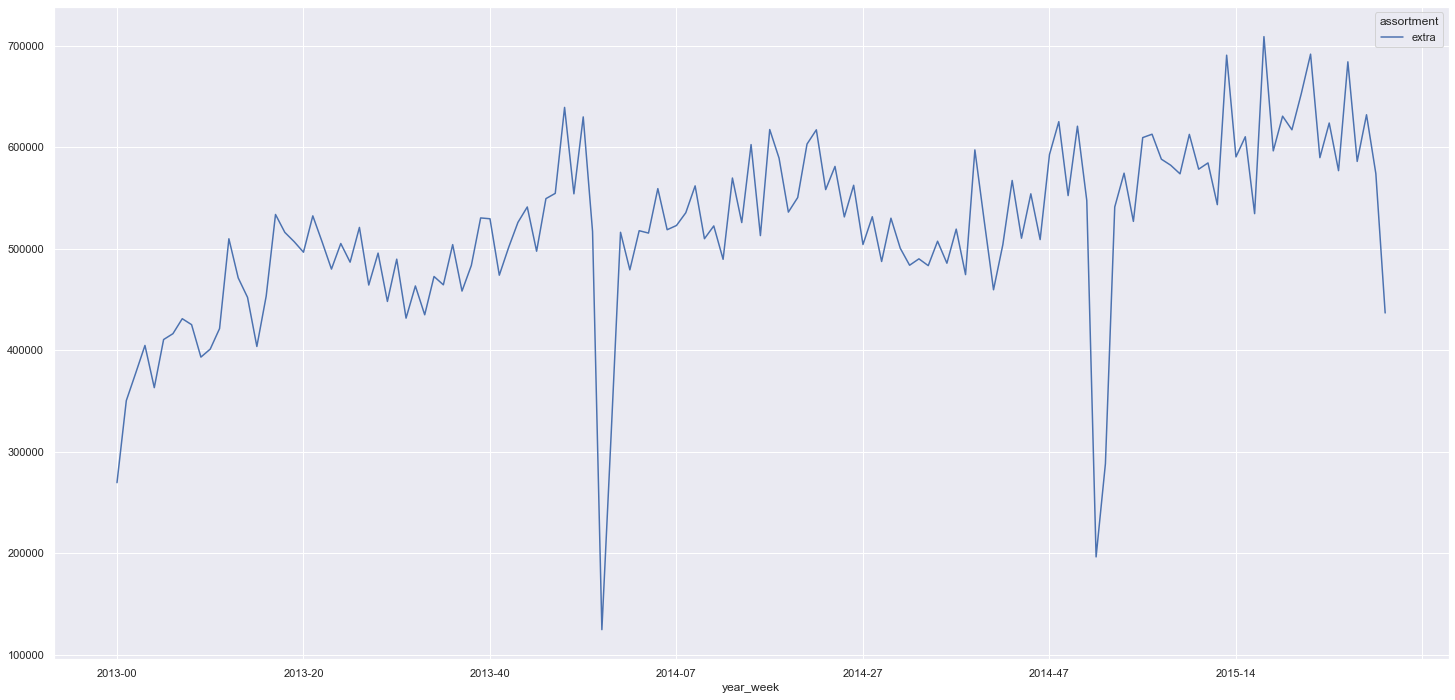

In [15]:
aux1 = df1[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment',y='sales', data= aux1)

aux2 = df1[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot( index= 'year_week', columns= 'assortment', values= 'sales').plot()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index= 'year_week', columns= 'assortment', values= 'sales').plot();


### H2. Lojas com competidores mais próximos deveriam vender menos.

**FALSA - Lojas com competidores mais próximos vendem mais.**

<AxesSubplot:>

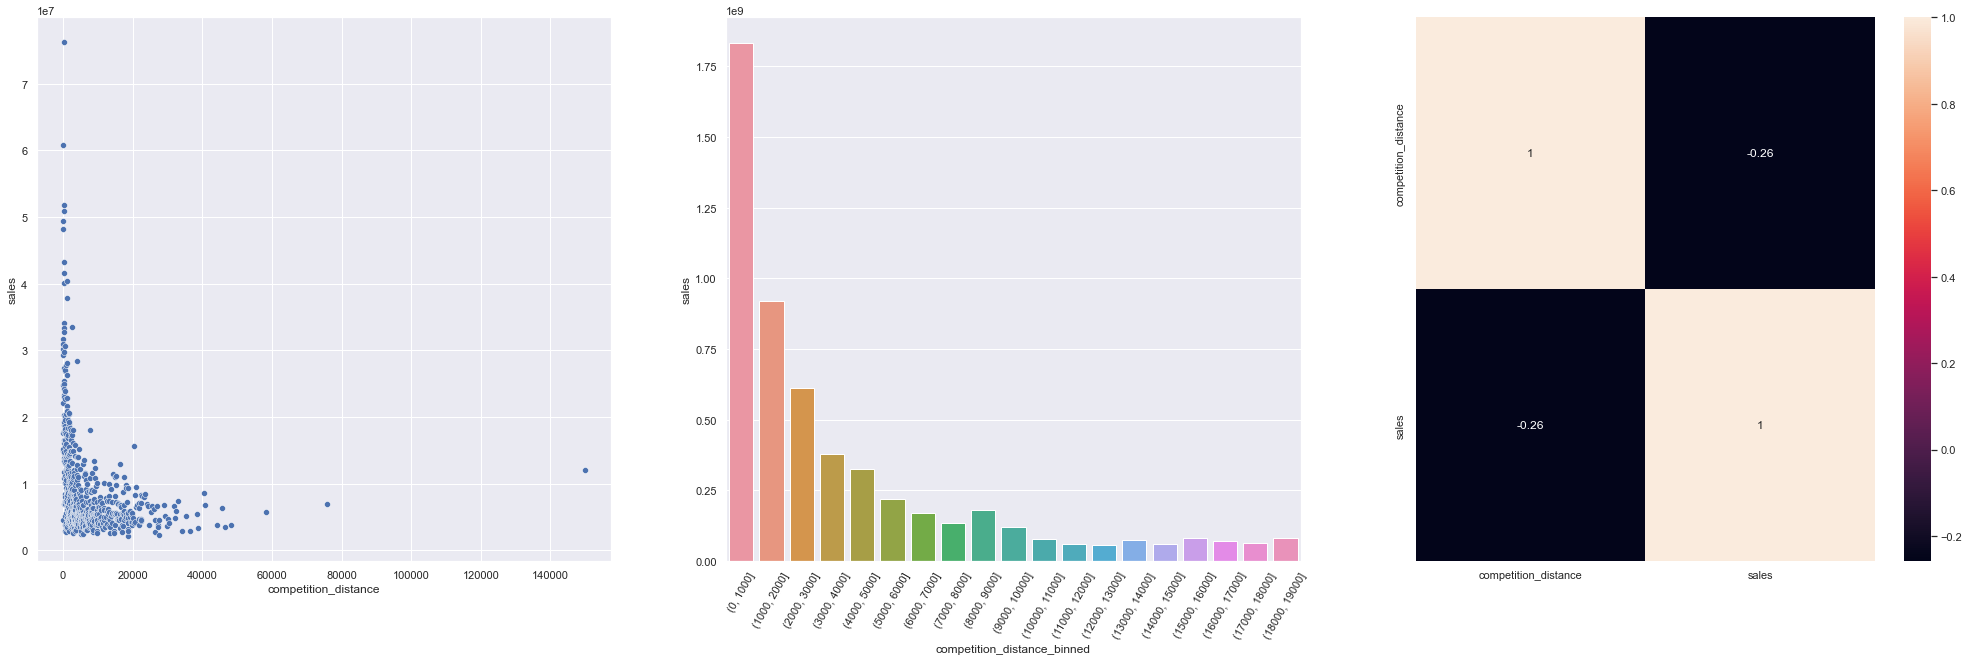

In [16]:
aux1 = df1[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

plt.figure(figsize = [35,10])
plt.subplot(1,3,1)
# concentração dos dados
sns.scatterplot(x='competition_distance', y='sales', data=aux1);

# Criando grupo de valores para reproduzir o gráfico em barras
bins = list( np.arange (0,20000, 1000))

plt.subplot(1,3,2)
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned', y= 'sales', data=aux2)
plt.xticks(rotation = 60)

plt.subplot(1,3,3)
# Força de correlação entre a target e a variável competition Distance
sns.heatmap(aux1.corr(method = 'pearson'), annot=True)


### H3. Lojas com competidores à mais tempo deveriam vender mais.

**FALSA - Lojas competidores à mais tempo vendem menos que do que aqueles que competidores a menos tempo**

<AxesSubplot:>

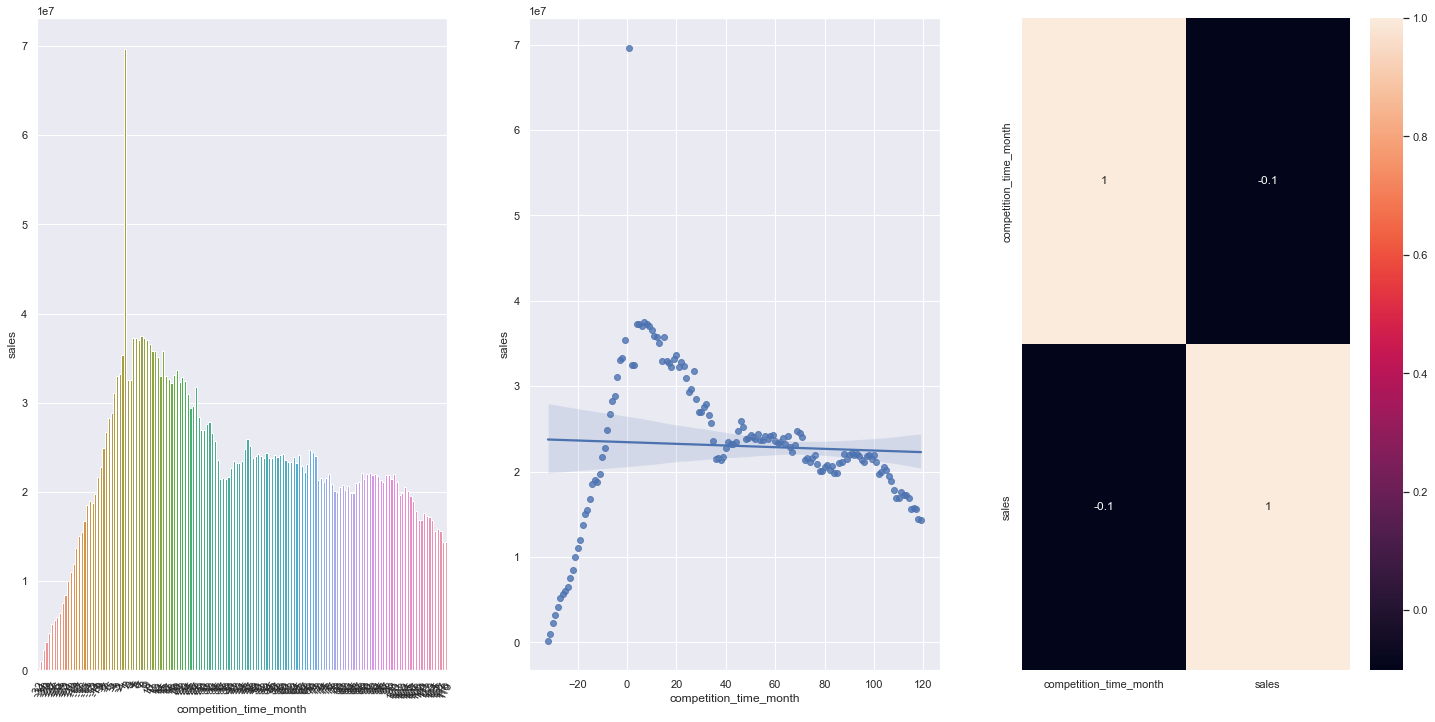

In [17]:
plt.subplot(1,3,1)
aux1 = df1[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120 ) & (aux1['competition_time_month'] != 0 )]
sns.barplot(x='competition_time_month', y='sales', data=aux2)
plt.xticks(rotation = 60)


plt.subplot(1,3,2)
sns.regplot(x='competition_time_month' , y='sales', data=aux2)

# Verificando a relevância para o modelo
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot=True)


### H4: Lojas com promoções ativas por mais tempo deveriam vender mais.

- **FALSA:** As lojas podem até vender mais até certo tempo, mas depois as vendas começam a decair.

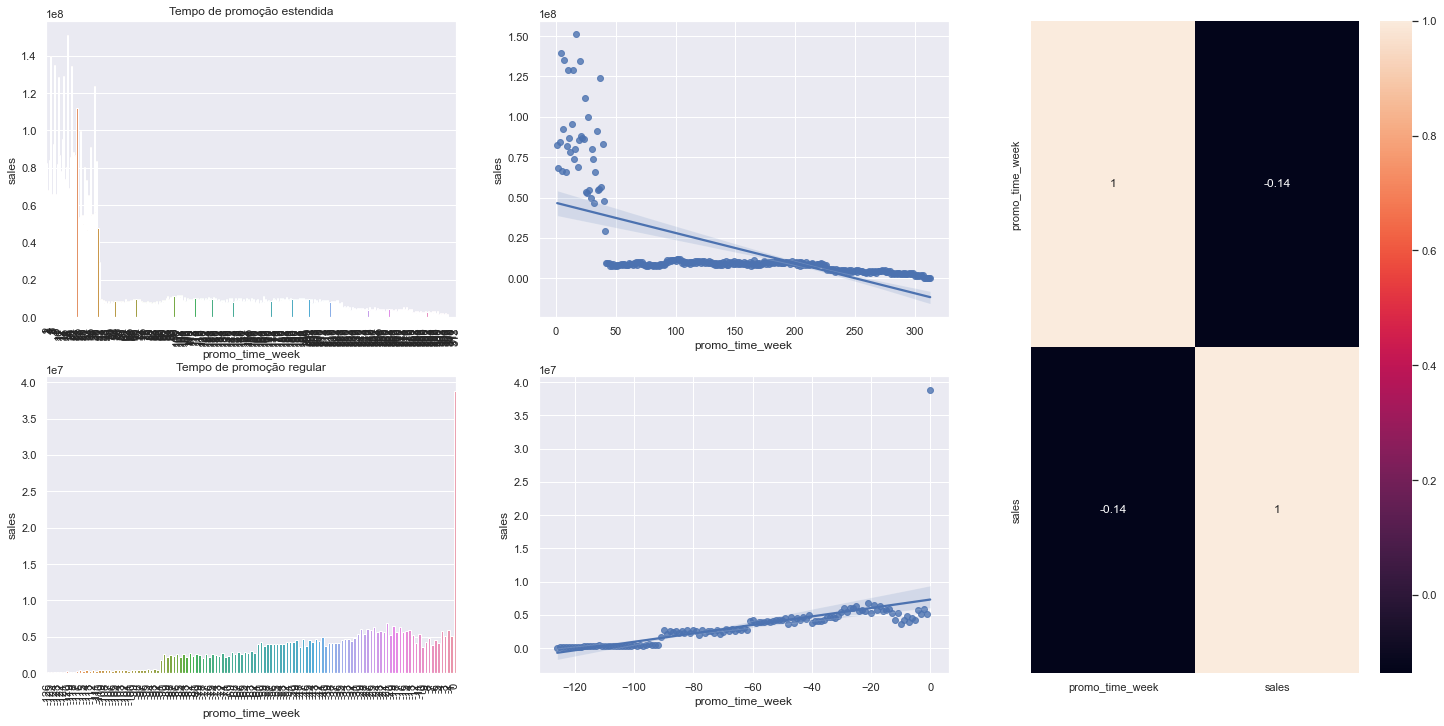

In [18]:
aux1 = df1[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()
#sns.barplot(x= 'promo_time_week',y='sales',data=aux1);

grid = GridSpec(2,3)

plt.subplot(grid[0,0])
aux2 = aux1[aux1['promo_time_week']> 0] # Promo extendida
sns.barplot(x= 'promo_time_week',y='sales',data=aux2)
plt.title('Tempo de promoção estendida')
plt.xticks(rotation=90);

plt.subplot(grid[0,1])
sns.regplot(x= 'promo_time_week',y='sales',data=aux2)


plt.subplot(grid[1,0])
aux3 = aux1[aux1['promo_time_week']<= 0] # Promo regular
sns.barplot(x= 'promo_time_week',y='sales',data=aux3)
plt.title('Tempo de promoção regular')
plt.xticks(rotation=90)

plt.subplot(grid[1,1])
sns.regplot(x= 'promo_time_week',y='sales',data=aux3)

plt.subplot(grid[:,2])
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### <s>H5: Lojas com mais dias de promoções deveriam vender mais.</s>

### H6: Lojas com mais promoções consecultivas deveriam vender mais.

Variáveis:
- promo
- promo2
- sales

In [19]:
df1[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index().sort_values('sales')

,promo,promo2,sales
1,0,1,1289362241
3,1,1,1472275754
0,0,0,1482612096
2,1,0,1628930532


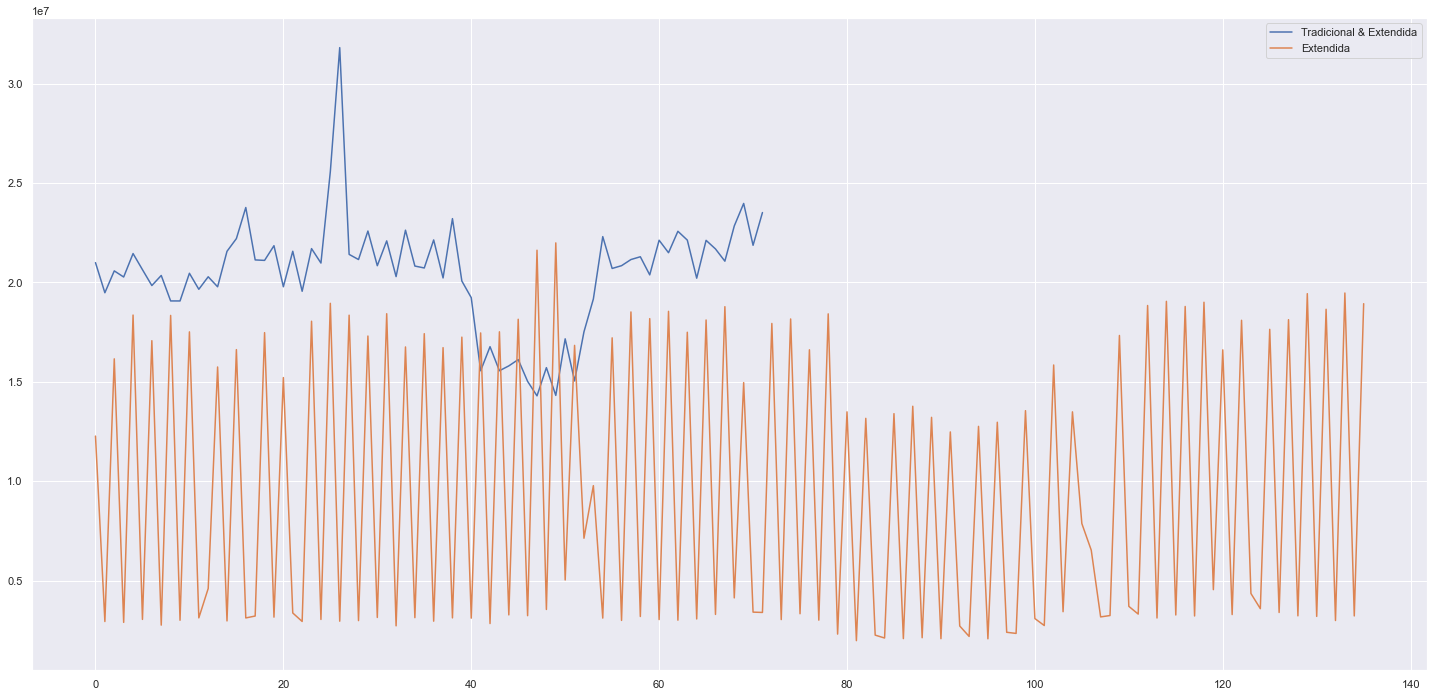

In [20]:
aux1 = df1[(df1['promo'] == 1) & (df1['promo2'] == 1)][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df1[(df1['promo'] == 0) & (df1['promo2'] == 1)][['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax)

ax.legend(labels = ['Tradicional & Extendida', 'Extendida'])

### **H7** Lojas abertas durante o feriado do Natal deveriam vender mais.

* **FALSA:** Lojas abertas durante o feriado do Natal vendem menos. Entretanto, deve-se considerar que o feriado de Natal só existe uma vez no ano.

<AxesSubplot:xlabel='year', ylabel='sales'>

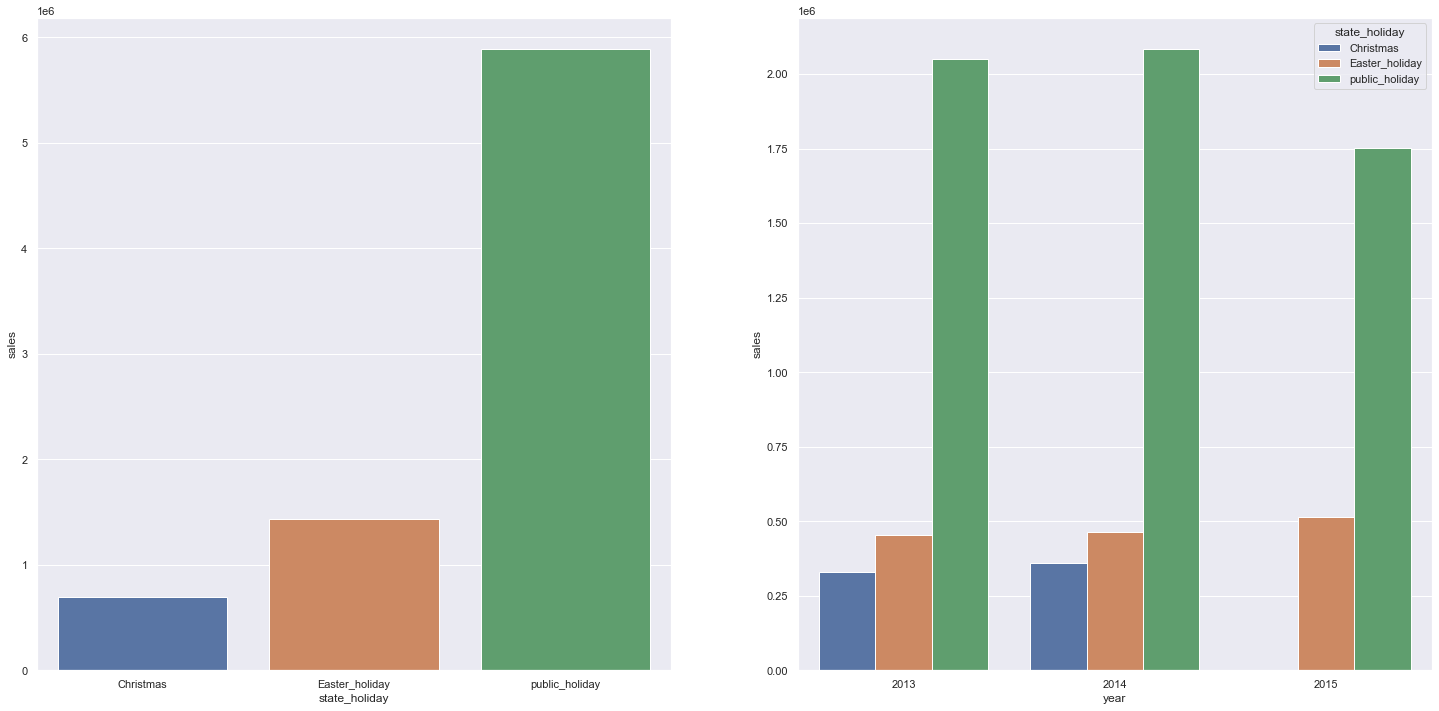

In [21]:
aux = df1[df1['state_holiday'] != 'Regular_day']

plt.subplot(1,2,1)
aux1 = aux[['sales', 'state_holiday']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1,2,2)
aux2 = aux[['sales', 'state_holiday','year']].groupby(['state_holiday', 'year']).sum().reset_index()
sns.barplot(x='year', y='sales', hue='state_holiday', data=aux2)


### **H8** Lojas deveriam vender mais ao longo dos anos.

* **FALSA:** As lojas vendem menos ao longo dos anos.

<AxesSubplot:>

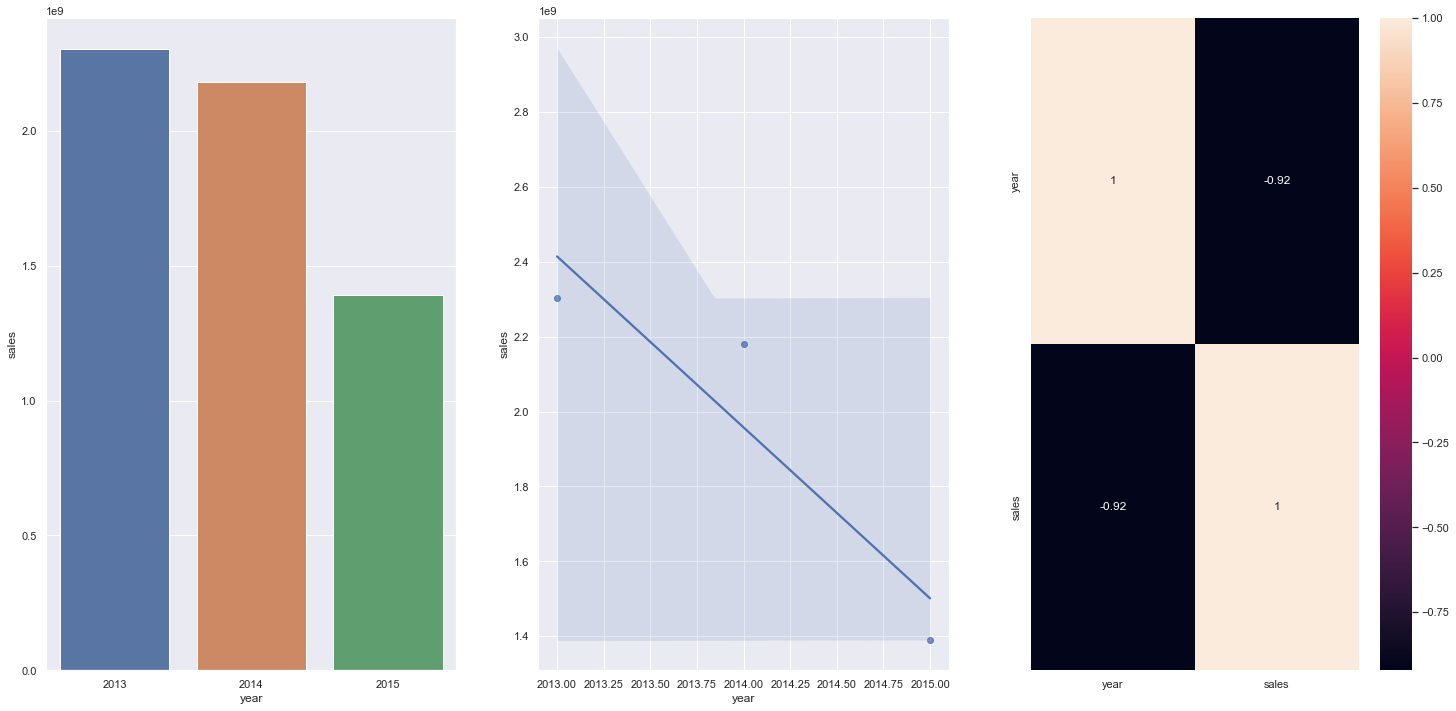

In [22]:
# Olhando a quantidade de vendas por ano
plt.subplot(1,3,1)
aux1 = df1[['year','sales']].groupby('year').sum().reset_index()
sns.barplot(x='year',y='sales',data=aux1);

# Olhando a linha de tendência dessas vendas
plt.subplot(1,3,2)
sns.regplot(x='year',y='sales',data=aux1);


# Observando o grau de correlação
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)

### **H9** Lojas deveriam vender mais no segundo semestre do ano.

* **FALSA:** As lojas vendem menos a partir do segundo semestre. Entretanto, o ano de 2015 parece não está completo, por tanto pode ser que essa hipótese se modifique com o ano fechado.

<AxesSubplot:>

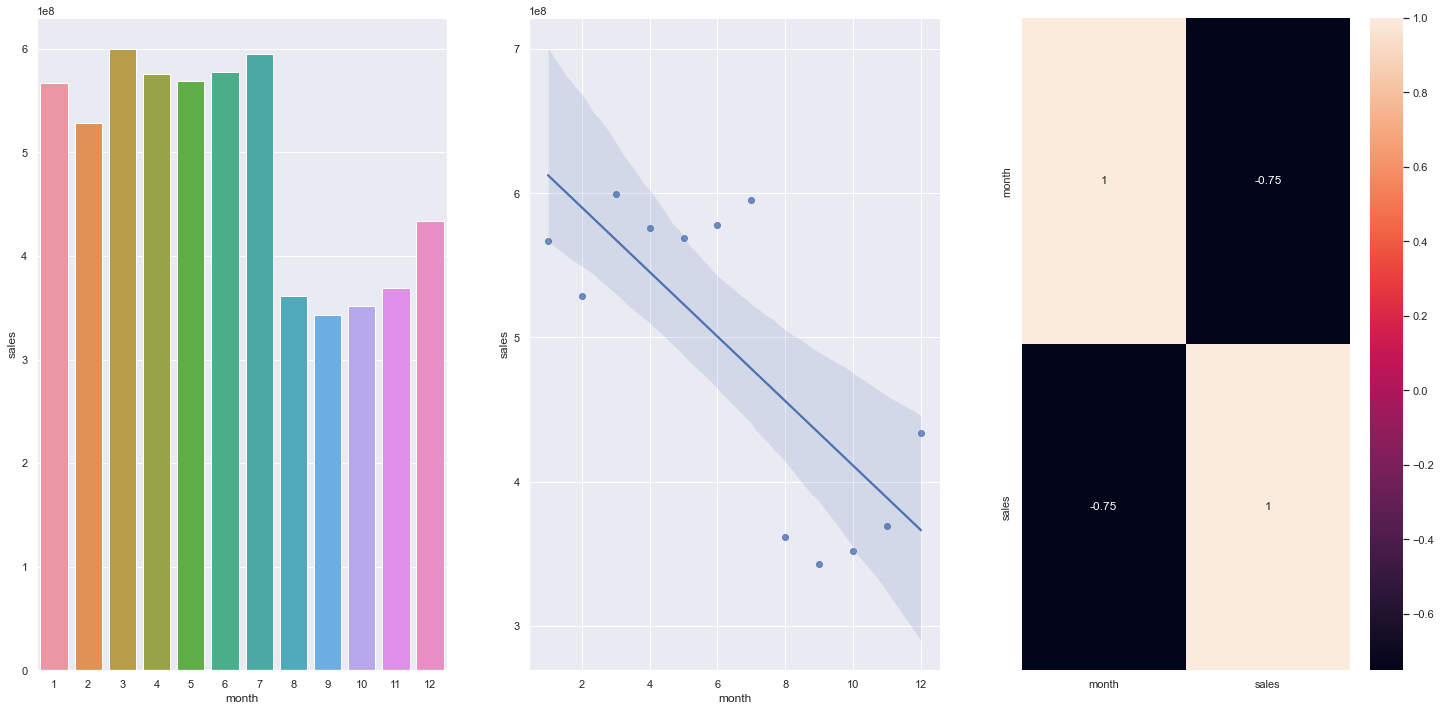

In [23]:
# Olhando a quantidade de vendas por ano

plt.subplot(1,3,1)
aux1 = df1[['month','sales']].groupby('month').sum().reset_index()
sns.barplot(x='month',y='sales',data=aux1);

# Olhando a linha de tendência dessas vendas
plt.subplot(1,3,2)
sns.regplot(x='month',y='sales',data=aux1);


# Observando o grau de correlação
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)

### **H10** Lojas deveriam vender mais depois do dia 10 de cada mês.

**VERDADEIRA:** Lojas vendem mais depois do dia 10

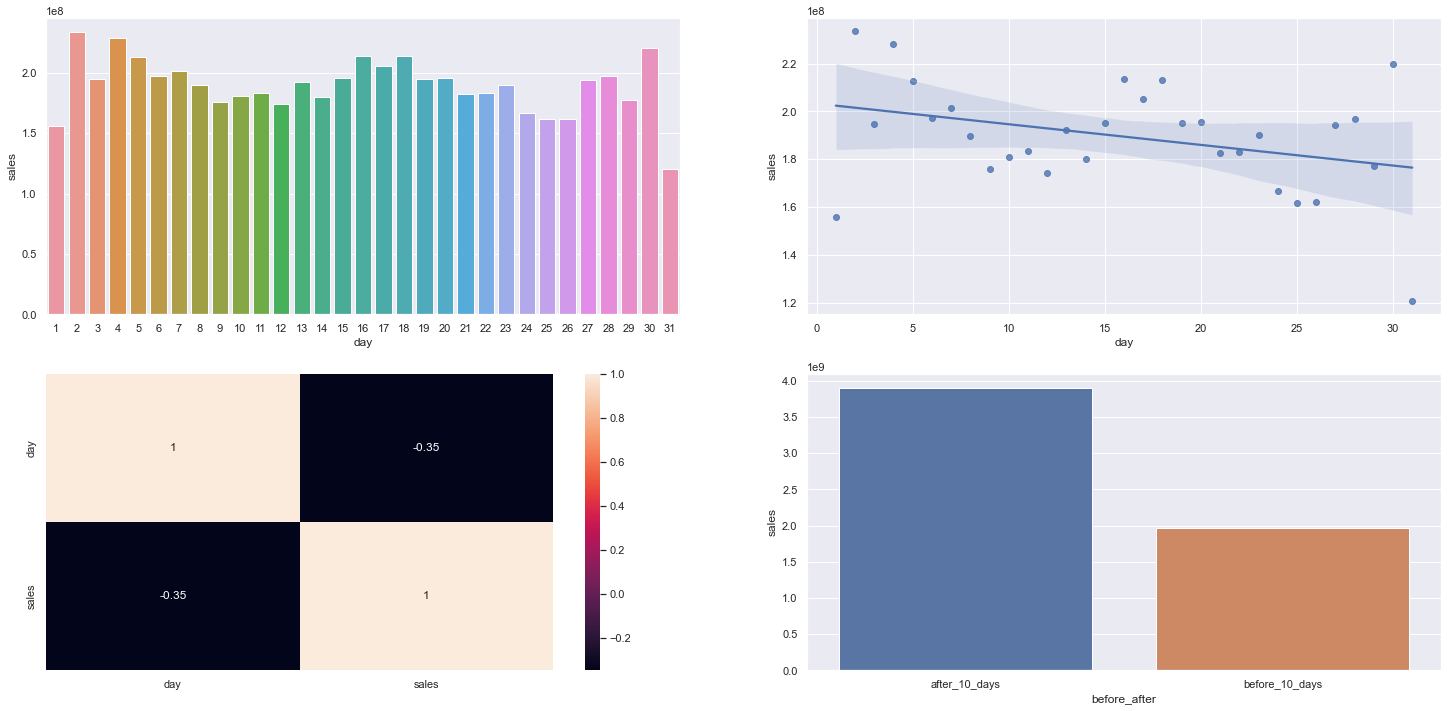

In [24]:
# Olhando a quantidade de vendas por ano
plt.subplot(2,2,1)
aux1 = df1[['day','sales']].groupby('day').sum().reset_index()
aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <=10 else 'after_10_days')

sns.barplot(x='day',y='sales',data=aux1);

# Olhando a linha de tendência dessas vendas
plt.subplot(2,2,2)
sns.regplot(x='day',y='sales',data=aux1);


# Observando o grau de correlação
plt.subplot(2,2,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)

aux2 = aux1[['before_after','sales']].groupby( 'before_after' ).sum().reset_index()
plt.subplot(2,2,4)
sns.barplot(x='before_after', y='sales',data=aux2);

### **H11** Lojas deveriam vender menos aos finais de semana.

**VERDADEIRA:** Lojas vendem menos aos fins de semana.

<AxesSubplot:>

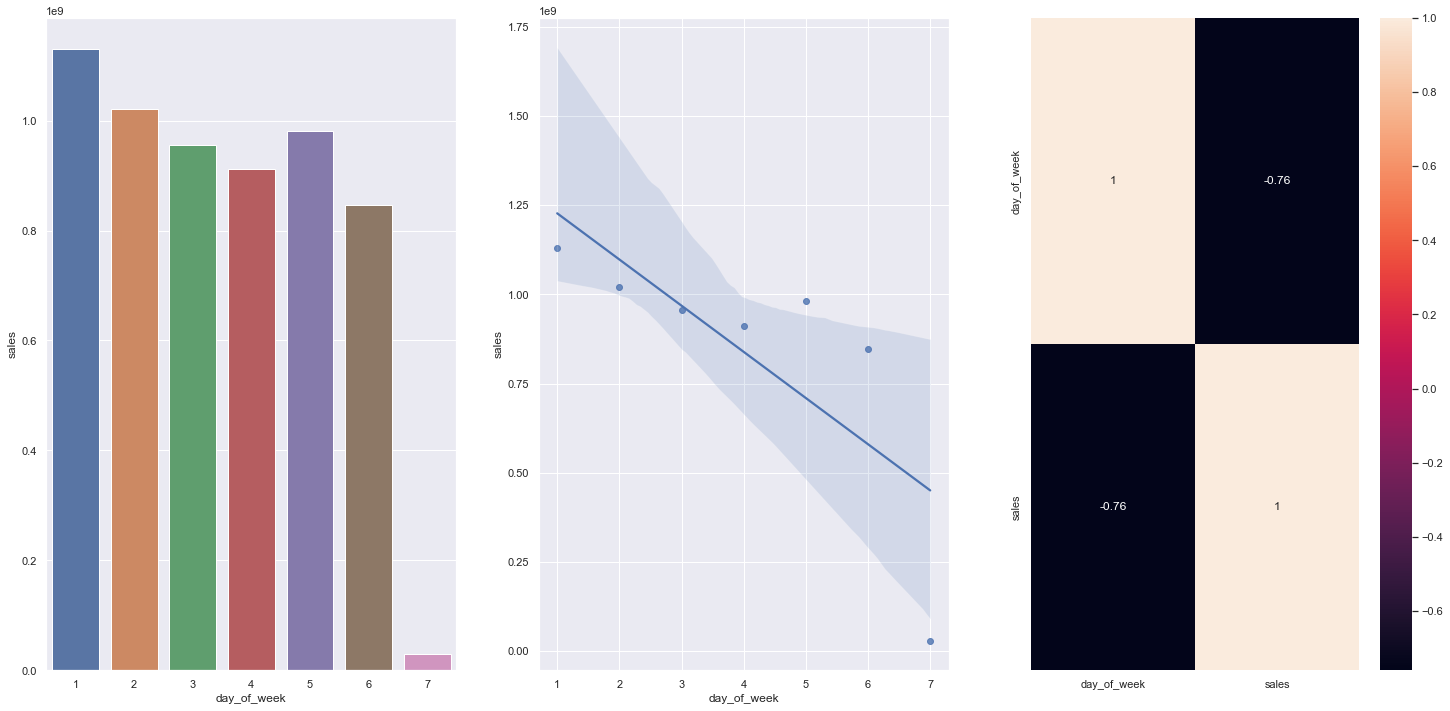

In [25]:
# Olhando a quantidade de vendas por ano
plt.subplot(1,3,1)
aux1 = df1[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

sns.barplot(x='day_of_week',y='sales',data=aux1);

# Olhando a linha de tendência dessas vendas
plt.subplot(1,3,2)
sns.regplot(x='day_of_week',y='sales',data=aux1);


# Observando o grau de correlação
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)

### **H12** Lojas deveriam vender menos durante os feriados escolares.

<AxesSubplot:xlabel='month', ylabel='sales'>

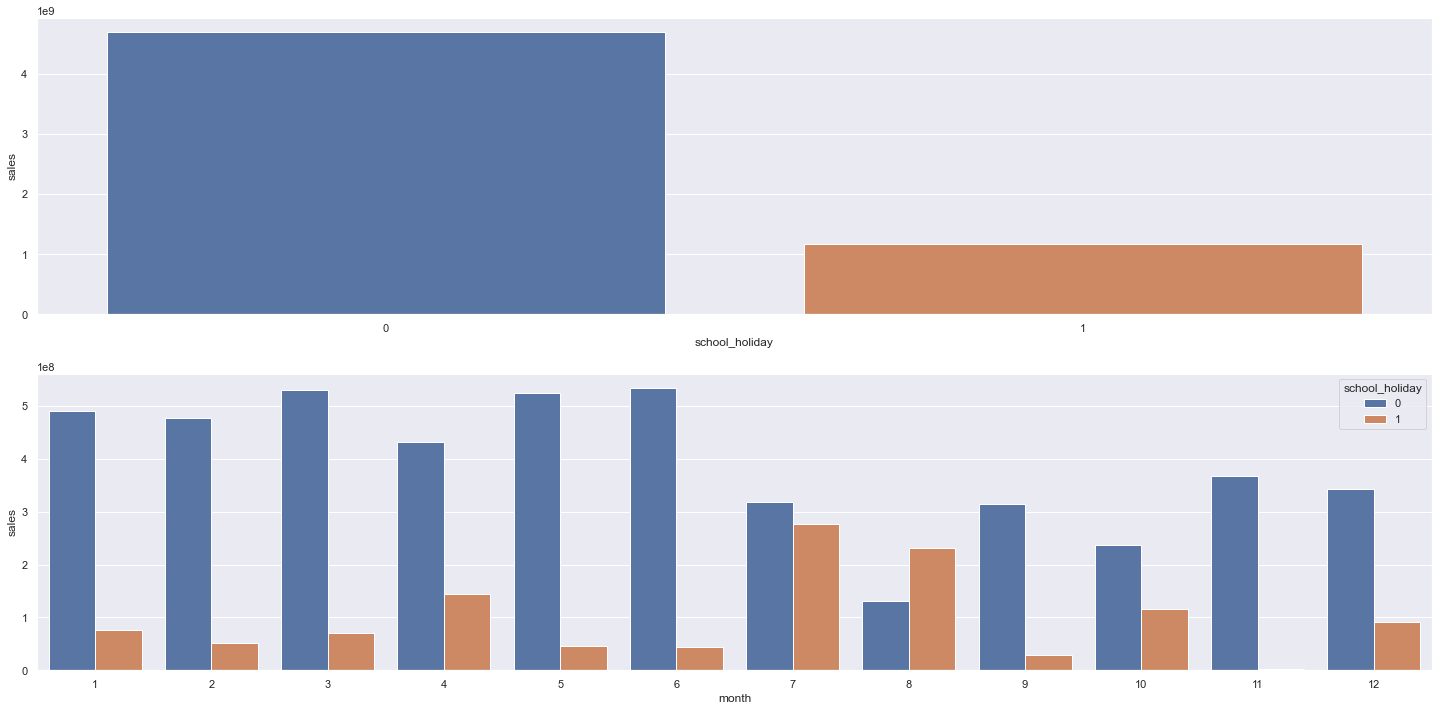

In [26]:
plt.subplot(2,1,1)
aux1 = df1[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
sns.barplot(x='school_holiday', y='sales', data=aux1)

plt.subplot(2,1,2)
aux2 = df1[['month','school_holiday','sales']].groupby(['school_holiday','month']).sum().reset_index()
sns.barplot(x='month', y='sales', data=aux2, hue='school_holiday')

## 1.3 Análise multivariada

Teoria de Occam (Navalha de occam): Se tivermos vários modelos, temos que escolher o de menor complexidade. Ou seja, menor dimensionalidade (Menor números de colunas).
Para retirar algumas colunas se faz necessário analisar a perda de informação verificando a correlação com a variável target ou correlação entre variáveis de entrada diferentes.

Existem técnicas mais avançadas para redução de dimensionalidade no qual reduz drasticamente a perda de informação, caso fosse feita de forma manual.

### 1.3.1 Numerical attributes

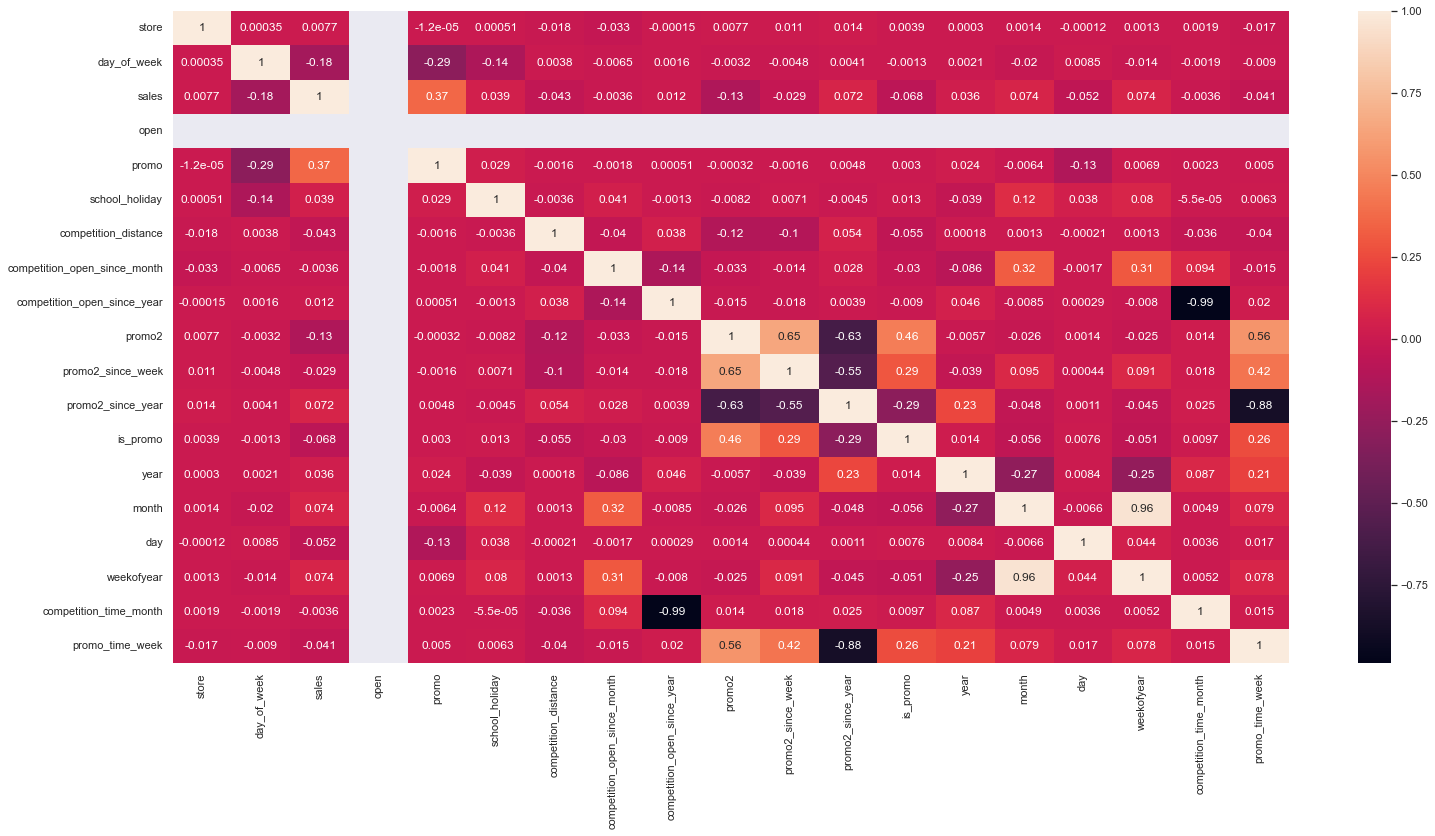

In [27]:
correlation = num_attributes.corr(method= 'pearson')
sns.heatmap( correlation, annot = True);

### 1.3.2 Categorical Attributes

Será utilizado o método Cramer V para fazer o cálculo de correlação entre variáveis categóricas

In [28]:
from scipy import stats as ss

In [29]:
# Only categorical Data
a = cat_attributes.drop(columns='year_week')

# Calculate Cramer V
a1 = cramer_v(a['state_holiday'],a['state_holiday'])
a2 = cramer_v(a['state_holiday'],a['store_type'])
a3 = cramer_v(a['state_holiday'],a['assortment'])

a4 = cramer_v(a['store_type'],a['state_holiday'])
a5 = cramer_v(a['store_type'],a['store_type'])
a6 = cramer_v(a['store_type'],a['assortment'])

a7 = cramer_v(a['assortment'],a['state_holiday'])
a8 = cramer_v(a['assortment'],a['store_type'])
a9 = cramer_v(a['assortment'],a['assortment'])

d = pd.DataFrame({'state_holiday':[a1,a2,a3],
                'store_type':[a4,a5,a6],
                'assortment':[a7,a8,a9]})

d = d.set_index(d.columns)

<AxesSubplot:>

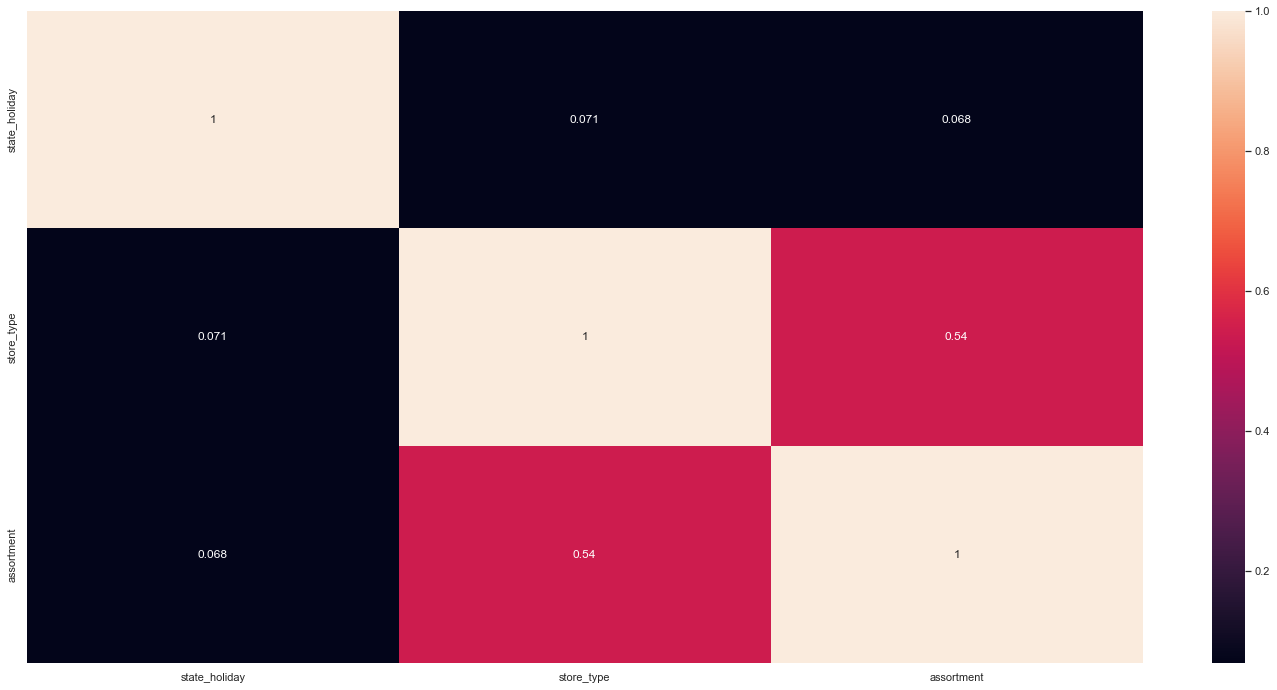

In [40]:
sns.heatmap(d, annot=True)